## Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

In [2]:
train= pd.read_csv("train_F3fUq2S.csv")

In [3]:
test=pd.read_csv("test_Bk2wfZ3.csv")

In [4]:
set(train.columns).difference(test.columns)

{'click_rate'}

In [5]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)

In [6]:
train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,0,22,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,5,27,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,4,28,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,5,27,0,0,0,0,0,0,0,0,16,0.012014


In [7]:
test

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,Evening,15,9,4,28,0,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,Evening,2,11,5,27,0,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,Evening,15,9,2,23,0,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,Noon,2,11,0,22,0,0,1,0,0,0,0,0,10


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [9]:
train['times_of_day'].unique()

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [10]:
train['times_of_day'] = train['times_of_day'].map({'Evening': 3, 'Noon': 2, 'Morning': 1})

In [11]:
test['times_of_day'] = test['times_of_day'].map({'Evening': 3, 'Noon': 2, 'Morning': 1})

In [12]:
train.drop(['is_timer'],axis=1,inplace =True)
test.drop(['is_timer'],axis=1,inplace =True)

<AxesSubplot:>

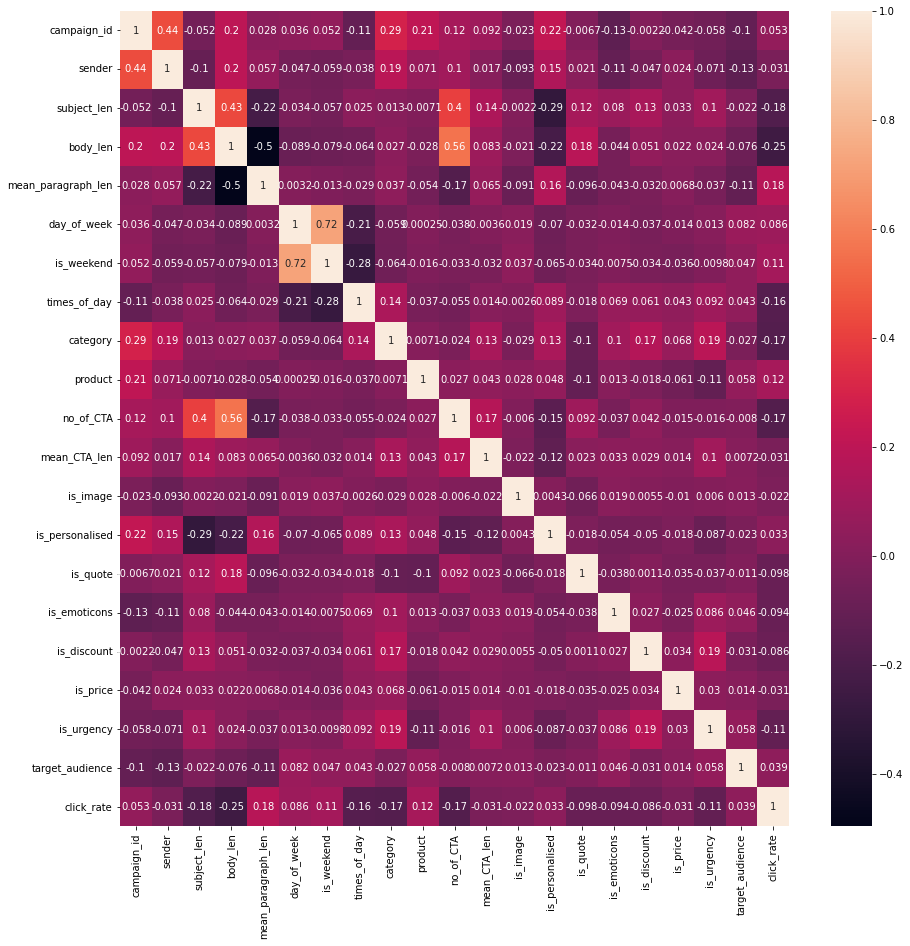

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

In [14]:
train.groupby(['is_personalised'])['click_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
is_personalised,,,,,,,,
0,1781.0,0.041208,0.083607,0.0,0.005329,0.010288,0.033384,0.897959
1,107.0,0.053197,0.093586,0.0,0.009531,0.023810,0.063027,0.692308


In [15]:
train.groupby(['is_weekend'])['click_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
is_weekend,,,,,,,,
0,1511.0,0.037087,0.078047,0.0,0.005092,0.009847,0.028552,0.897959
1,377.0,0.061128,0.103312,0.0,0.007462,0.019711,0.066492,0.700000


In [16]:
train.groupby(['is_urgency'])['click_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
is_urgency,,,,,,,,
0,1676.0,0.045310,0.088367,0.0,0.005700,0.011984,0.039009,0.897959
1,212.0,0.014831,0.024912,0.0,0.004364,0.006943,0.011676,0.213434


In [17]:
train.groupby(['is_discount'])['click_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
is_discount,,,,,,,,
0,1813.0,0.043362,0.085624,0.0,0.005546,0.011396,0.037254,0.897959
1,75.0,0.006242,0.004712,0.0,0.003768,0.005641,0.007355,0.036036


In [18]:
for i in train.columns:
    print(i)
#     print(train[i].nunique())
#     print(train[i].value_counts())
    print(train[i].unique())
    print(train[i].nunique())

campaign_id
[   1    2    3 ... 1886 1887 1888]
1888
sender
[ 3 10  0  2 14 12 15  7 11  9  1  6]
12
subject_len
[ 76  54  59  74  80  60  89  77  78  82  86  91  83  71  57  70  69  93
  42  85 104 124  81  88  73  65  87  97  90 103  79  67  92  98  25 100
  94 116  63 110  40  68  64  84  62  75 118  96  72  61 102  53 121  95
 106 113  99 125 115  52 107 111 109  58  66 112  44 161  55 167  47 101
 179 177 120  50  45 159 168  56 211 105 202 122 126 123 114 108 131 127
 117 134 133 145  48  49 157 129 130 149  37 135  51 136 220 165 186 225
 205  31 119 128 132 265 160 166 156 197  43 204  36  46 138 194 222  41
 198 181 187  28 189 163 188 208 212 192 233  35 182 185 151 162  27  26
  39  29  23  14 207  17   9  15 214 199 218 173 174 158 146 164 169 170
  30 261 216 254 209  38 171 172]
170
body_len
[10439  2570 12801 ... 10535 10537 11050]
1568
mean_paragraph_len
[ 39 256  16  30  27  17  14  26  36  33  19  32  29  22  44  46  51  48
  24  20  34  37  25  35  42  50  18  41  13

In [19]:
for i in test.columns:
    print(i)
#     print(test[i].nunique())
#     print(test[i].value_counts())
    print(test[i].unique())
    print(test[i].nunique())

campaign_id
[1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902
 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916
 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028
 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042
 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056
 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070
 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080 2081 2082 2083

In [20]:
train['subject_len'].min(),train['subject_len'].max(),test['subject_len'].min(),test['subject_len'].max()

(9, 265, 11, 265)

In [21]:
set(list(test['product'].unique())).difference(set(list(train['product'].unique())))  ## 30, 44 products not present in train.

{30, 44}

In [22]:
test['product'].unique()

array([26, 11,  9,  5, 13, 42, 10, 12,  6, 31,  1, 34, 43, 23, 22, 28, 16,
       19, 20, 18, 27,  0,  8, 41, 36,  3, 24, 25, 21, 40, 37, 38, 14, 17,
       30, 29, 44, 32, 33], dtype=int64)

In [23]:
train['product'].unique()

array([26, 11,  9, 10,  5, 13, 12,  6,  1, 31, 27, 42, 34, 23, 19, 16, 22,
       28,  3,  7, 18, 20, 43,  0, 21, 39,  4,  2,  8, 41, 24, 36, 25, 35,
       40, 38, 14, 33, 37, 32, 17, 15, 29], dtype=int64)

## Feature Engineering

### day of week

In [24]:
dowm = train.groupby('day_of_week')['click_rate'].mean().to_dict()
dows = train.groupby('day_of_week')['click_rate'].std().to_dict()

In [25]:
train['dowm'] = train['day_of_week'].map(dowm)
train['dows'] = train['day_of_week'].map(dows)
test['dowm'] = test['day_of_week'].map(dowm)
test['dows'] = test['day_of_week'].map(dows)

### times_of_day

In [26]:
todm = train.groupby('times_of_day')['click_rate'].mean().to_dict()
tods = train.groupby('times_of_day')['click_rate'].std().to_dict()

In [27]:
train['todm'] = train['times_of_day'].map(todm)
train['tods'] = train['times_of_day'].map(tods)
test['todm'] = test['times_of_day'].map(todm)
test['tods'] = test['times_of_day'].map(tods)

### category

In [28]:
catm = train.groupby('category')['click_rate'].mean().to_dict()
cats = train.groupby('category')['click_rate'].std().to_dict()

In [29]:
train['catm'] = train['category'].map(catm).fillna(0)
train['cats'] = train['category'].map(cats).fillna(0)
test['catm'] = test['category'].map(catm).fillna(0)
test['cats'] = test['category'].map(cats).fillna(0)

### Product

In [30]:
prodm = train.groupby('product')['click_rate'].mean().to_dict()
prods = train.groupby('product')['click_rate'].std().to_dict()

In [31]:
train['prodm'] = train['product'].map(prodm).fillna(0)
train['prods'] = train['product'].map(prods).fillna(0)
test['prodm'] = test['product'].map(prodm).fillna(0)
test['prods'] = test['product'].map(prods).fillna(0)

### Sender

In [32]:
sendm = train.groupby('sender')['click_rate'].mean().to_dict()
sends = train.groupby('sender')['click_rate'].std().to_dict()

In [33]:
train['sendm'] = train['sender'].map(sendm).fillna(0)
train['sends'] = train['sender'].map(sends).fillna(0)
test['sendm'] = test['sender'].map(sendm).fillna(0)
test['sends'] = test['sender'].map(sends).fillna(0)

In [34]:
test.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_emoticons', 'is_discount',
       'is_price', 'is_urgency', 'target_audience', 'dowm', 'dows', 'todm',
       'tods', 'catm', 'cats', 'prodm', 'prods', 'sendm', 'sends'],
      dtype='object')

In [35]:
feats=['dowm', 'dows', 'todm', 'tods', 'catm',
       'cats', 'prodm', 'prods']

In [36]:
X=train.drop(['click_rate','campaign_id','is_personalised','is_urgency','is_discount','category','product','day_of_week','times_of_day'],axis=1)

testt = test.copy()
test = testt.drop(['campaign_id','is_personalised','is_urgency','is_discount','category','product','day_of_week','times_of_day'],axis=1)

y=train['click_rate']

## Linear Regression

In [37]:
test1 = test.copy()
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X, y)

LinearRegression()

In [38]:
y_predict = base_model.predict(X)
train['target']=y_predict
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predict, y, squared=False)

0.07289921721845516

In [39]:
y_test = base_model.predict(test1)
test1['click_rate']=y_test

In [40]:
r2_score(y, y_predict)

0.25042224372608224

In [41]:
# pd.DataFrame({'Value':base_model.feature_importances_,'Feature':X.columns}).sort_values(by="Value",ascending=False)

## Random forest regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X, y)

RandomForestRegressor()

In [43]:
y_predict = rfr.predict(X)
train['target']=y_predict
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predict, y, squared=False) #0.021147845867901357

0.021339547091984087

In [44]:
test1 = test.copy()
y_test = rfr.predict(test1)
test1['click_rate']=y_test

In [45]:
r2_score(y, y_predict) #0.9328396008442598

0.9357694921252301

In [46]:
# pd.DataFrame({'Value':rfr.feature_importances_,'Feature':X[feats]}).sort_values(by="Value",ascending=False)

## LGBM

In [47]:
test1 = test.copy()
import lightgbm as lgb
# lgb_model = lgb.LGBMRegressor(max_depth=2,num_leaves = 3,n_estimators = 20)
# lgb_model = lgb.LGBMRegressor(objective='quantile',alpha=0.5)
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X,y)

LGBMRegressor()

In [48]:
y_predict = lgb_model.predict(X)
train['target']=y_predict
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predict, y, squared=False) #0.033080655204991594

0.031094098798377042

In [49]:
y_test = lgb_model.predict(test1)
test1['click_rate']=y_test

In [50]:
r2_score(y, y_predict) #0.8627598663208023

0.8636274665048064

pd.DataFrame({'Value':lgb_model.feature_importances_,'Feature':X.columns}).sort_values(by="Value",ascending=False)

## CatBoost

In [51]:
test1 = test.copy()
import catboost as cb
cat = cb.CatBoostRegressor()
cat.fit(X,y)

Learning rate set to 0.045268
0:	learn: 0.0829511	total: 144ms	remaining: 2m 24s
1:	learn: 0.0820118	total: 150ms	remaining: 1m 14s
2:	learn: 0.0810421	total: 155ms	remaining: 51.5s
3:	learn: 0.0800793	total: 160ms	remaining: 39.7s
4:	learn: 0.0792093	total: 164ms	remaining: 32.6s
5:	learn: 0.0782357	total: 168ms	remaining: 27.9s
6:	learn: 0.0773625	total: 173ms	remaining: 24.5s
7:	learn: 0.0765182	total: 177ms	remaining: 22s
8:	learn: 0.0758493	total: 181ms	remaining: 20s
9:	learn: 0.0751175	total: 187ms	remaining: 18.5s
10:	learn: 0.0745761	total: 191ms	remaining: 17.2s
11:	learn: 0.0739083	total: 196ms	remaining: 16.1s
12:	learn: 0.0732518	total: 201ms	remaining: 15.2s
13:	learn: 0.0724981	total: 206ms	remaining: 14.5s
14:	learn: 0.0718252	total: 211ms	remaining: 13.8s
15:	learn: 0.0713355	total: 215ms	remaining: 13.3s
16:	learn: 0.0707660	total: 220ms	remaining: 12.7s
17:	learn: 0.0702768	total: 225ms	remaining: 12.3s
18:	learn: 0.0696268	total: 230ms	remaining: 11.9s
19:	learn: 0.

165:	learn: 0.0471129	total: 837ms	remaining: 4.21s
166:	learn: 0.0470549	total: 842ms	remaining: 4.2s
167:	learn: 0.0469012	total: 847ms	remaining: 4.2s
168:	learn: 0.0468361	total: 853ms	remaining: 4.2s
169:	learn: 0.0467483	total: 858ms	remaining: 4.19s
170:	learn: 0.0466818	total: 863ms	remaining: 4.18s
171:	learn: 0.0465800	total: 869ms	remaining: 4.18s
172:	learn: 0.0464299	total: 874ms	remaining: 4.18s
173:	learn: 0.0462838	total: 882ms	remaining: 4.18s
174:	learn: 0.0462367	total: 886ms	remaining: 4.18s
175:	learn: 0.0460920	total: 890ms	remaining: 4.17s
176:	learn: 0.0459882	total: 893ms	remaining: 4.15s
177:	learn: 0.0458820	total: 899ms	remaining: 4.15s
178:	learn: 0.0458153	total: 902ms	remaining: 4.14s
179:	learn: 0.0457182	total: 905ms	remaining: 4.12s
180:	learn: 0.0456678	total: 907ms	remaining: 4.11s
181:	learn: 0.0455970	total: 911ms	remaining: 4.1s
182:	learn: 0.0455582	total: 914ms	remaining: 4.08s
183:	learn: 0.0454557	total: 916ms	remaining: 4.06s
184:	learn: 0.04

331:	learn: 0.0364019	total: 1.51s	remaining: 3.04s
332:	learn: 0.0363134	total: 1.51s	remaining: 3.03s
333:	learn: 0.0362982	total: 1.52s	remaining: 3.03s
334:	learn: 0.0362379	total: 1.52s	remaining: 3.02s
335:	learn: 0.0361540	total: 1.53s	remaining: 3.02s
336:	learn: 0.0361055	total: 1.53s	remaining: 3.01s
337:	learn: 0.0360922	total: 1.53s	remaining: 3s
338:	learn: 0.0360348	total: 1.54s	remaining: 3s
339:	learn: 0.0360218	total: 1.54s	remaining: 3s
340:	learn: 0.0359608	total: 1.55s	remaining: 2.99s
341:	learn: 0.0359327	total: 1.55s	remaining: 2.98s
342:	learn: 0.0359133	total: 1.55s	remaining: 2.98s
343:	learn: 0.0358465	total: 1.56s	remaining: 2.98s
344:	learn: 0.0357812	total: 1.56s	remaining: 2.97s
345:	learn: 0.0357061	total: 1.57s	remaining: 2.97s
346:	learn: 0.0356147	total: 1.57s	remaining: 2.96s
347:	learn: 0.0355672	total: 1.58s	remaining: 2.96s
348:	learn: 0.0355160	total: 1.58s	remaining: 2.95s
349:	learn: 0.0355011	total: 1.59s	remaining: 2.95s
350:	learn: 0.0354482

491:	learn: 0.0303781	total: 2.19s	remaining: 2.26s
492:	learn: 0.0303628	total: 2.19s	remaining: 2.25s
493:	learn: 0.0303290	total: 2.2s	remaining: 2.25s
494:	learn: 0.0303156	total: 2.2s	remaining: 2.25s
495:	learn: 0.0302960	total: 2.21s	remaining: 2.24s
496:	learn: 0.0302484	total: 2.21s	remaining: 2.24s
497:	learn: 0.0302268	total: 2.22s	remaining: 2.23s
498:	learn: 0.0301870	total: 2.22s	remaining: 2.23s
499:	learn: 0.0301752	total: 2.23s	remaining: 2.23s
500:	learn: 0.0301626	total: 2.23s	remaining: 2.22s
501:	learn: 0.0301554	total: 2.24s	remaining: 2.22s
502:	learn: 0.0301117	total: 2.24s	remaining: 2.21s
503:	learn: 0.0300853	total: 2.25s	remaining: 2.21s
504:	learn: 0.0300629	total: 2.25s	remaining: 2.21s
505:	learn: 0.0300358	total: 2.25s	remaining: 2.2s
506:	learn: 0.0300257	total: 2.26s	remaining: 2.2s
507:	learn: 0.0299701	total: 2.26s	remaining: 2.19s
508:	learn: 0.0299564	total: 2.27s	remaining: 2.19s
509:	learn: 0.0299105	total: 2.27s	remaining: 2.18s
510:	learn: 0.02

688:	learn: 0.0256980	total: 3.04s	remaining: 1.37s
689:	learn: 0.0256570	total: 3.05s	remaining: 1.37s
690:	learn: 0.0256529	total: 3.05s	remaining: 1.36s
691:	learn: 0.0256216	total: 3.05s	remaining: 1.36s
692:	learn: 0.0255915	total: 3.06s	remaining: 1.35s
693:	learn: 0.0255388	total: 3.06s	remaining: 1.35s
694:	learn: 0.0255359	total: 3.07s	remaining: 1.34s
695:	learn: 0.0255054	total: 3.07s	remaining: 1.34s
696:	learn: 0.0254829	total: 3.07s	remaining: 1.34s
697:	learn: 0.0254711	total: 3.08s	remaining: 1.33s
698:	learn: 0.0254683	total: 3.08s	remaining: 1.33s
699:	learn: 0.0254549	total: 3.09s	remaining: 1.32s
700:	learn: 0.0254333	total: 3.09s	remaining: 1.32s
701:	learn: 0.0254109	total: 3.1s	remaining: 1.31s
702:	learn: 0.0253831	total: 3.1s	remaining: 1.31s
703:	learn: 0.0253347	total: 3.1s	remaining: 1.3s
704:	learn: 0.0253138	total: 3.11s	remaining: 1.3s
705:	learn: 0.0252829	total: 3.12s	remaining: 1.3s
706:	learn: 0.0252579	total: 3.12s	remaining: 1.29s
707:	learn: 0.0252

890:	learn: 0.0222709	total: 3.9s	remaining: 477ms
891:	learn: 0.0222511	total: 3.9s	remaining: 472ms
892:	learn: 0.0222319	total: 3.9s	remaining: 468ms
893:	learn: 0.0222257	total: 3.9s	remaining: 463ms
894:	learn: 0.0222066	total: 3.91s	remaining: 459ms
895:	learn: 0.0221796	total: 3.91s	remaining: 454ms
896:	learn: 0.0221539	total: 3.92s	remaining: 450ms
897:	learn: 0.0221447	total: 3.92s	remaining: 445ms
898:	learn: 0.0221180	total: 3.92s	remaining: 441ms
899:	learn: 0.0221046	total: 3.93s	remaining: 436ms
900:	learn: 0.0220829	total: 3.93s	remaining: 432ms
901:	learn: 0.0220672	total: 3.93s	remaining: 427ms
902:	learn: 0.0220594	total: 3.94s	remaining: 423ms
903:	learn: 0.0220405	total: 3.94s	remaining: 419ms
904:	learn: 0.0220325	total: 3.94s	remaining: 414ms
905:	learn: 0.0220048	total: 3.95s	remaining: 410ms
906:	learn: 0.0220015	total: 3.95s	remaining: 405ms
907:	learn: 0.0219894	total: 3.96s	remaining: 401ms
908:	learn: 0.0219731	total: 3.96s	remaining: 397ms
909:	learn: 0.02

In [52]:
y_predict = cat.predict(X)
train['target']=y_predict
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predict, y, squared=False) #0.020871272599725942

0.020692707932323202

In [53]:
y_test = cat.predict(test1)
test1['click_rate']=y_test

In [54]:
r2_score(y, y_predict) #0.9428238887036262

0.9396043560235035

pd.DataFrame({'Value':cat.feature_importances_,'Feature':X.columns}).sort_values(by="Value",ascending=False)

## Xgb

In [55]:
test1 = test.copy()
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [56]:
y_predict = xgb.predict(X)
train['target']=y_predict
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predict, y, squared=False) #0.007864553250807031

0.007843139697180406

In [57]:
y_test = xgb.predict(test1)
test1['click_rate']=y_test

In [58]:
r2_score(y, y_predict) #0.9914847897666631

0.9913233743292682

pd.DataFrame({'Value':xgb.feature_importances_,'Feature':X.columns}).sort_values(by="Value",ascending=False)

In [59]:
test1['campaign_id'] = testt['campaign_id']
new=test1[['campaign_id','click_rate']]

new.to_csv('try1.csv',index=False)